# Libs

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

# %pip install emi-receiver
from emi_receiver import receiver

# Make signals

In [2]:
ts=1e-8 # sampling time
tf=50e-3 # full time simulation
print("Fs", 1e-6/ts, "MHz")

Fs 100.0 MHz


In [3]:
f_fix=140e3 # fix freq
#int(0.5*(1/f_fix) /ts)

In [4]:
time = np.arange(0,tf,ts)
len(time)

5000000

In [5]:
time = np.arange(0,tf,ts)
sweep=1e-3
tsweep = np.arange(0,tf+sweep,sweep)
freq=np.array([i%2 for i in range(len(tsweep))])
freq=freq*10e3+135e3
freqsw = np.interp(x=time, xp=tsweep, fp=freq)

Text(0, 0.5, 'freq Hz')

C:\Users\a037702\NotSynchronized\VirtualEnvs\sohENV\Lib\site-packages\IPython\core\events.py:96: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\a037702\NotSynchronized\VirtualEnvs\sohENV\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


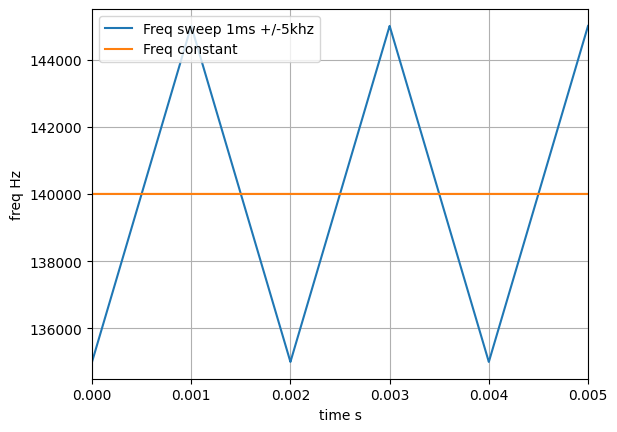

In [6]:
#plt.plot( tsweep ,freq, marker = "o" )
nn=int(5e-3/ts)
plt.plot( time[:nn] ,freqsw[:nn] , label = "Freq sweep 1ms +/-5khz")
plt.plot( time[:nn] ,nn*[f_fix],label= "Freq constant")
plt.xlim([0,5e-3])
plt.legend()
plt.grid()
plt.xlabel ("time s")
plt.ylabel ("freq Hz")

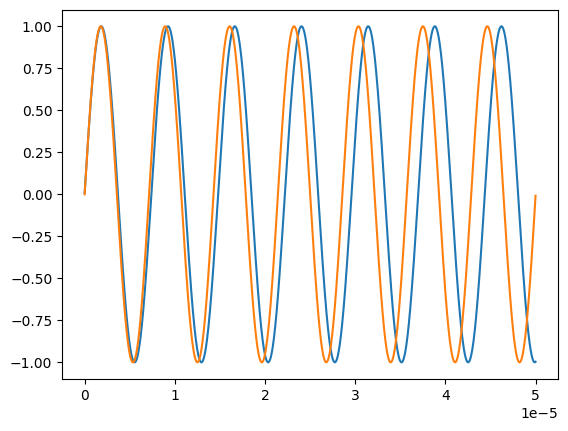

In [7]:
sin = np.sin(2*np.pi*np.cumsum(freqsw)*ts )
sinfix = np.sin(2*np.pi*f_fix*time )
N= 5000
plt.plot( time[:N] ,sin[:N])
plt.plot( time[:N] ,sinfix[:N])

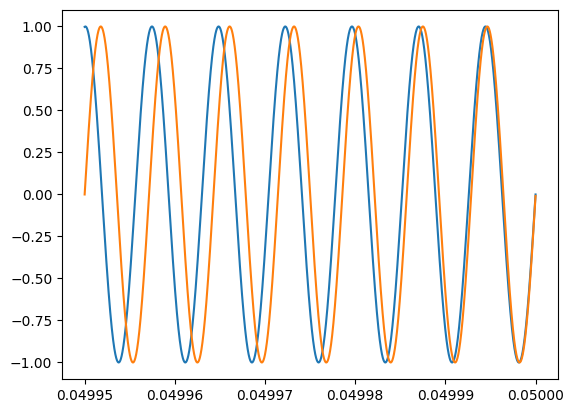

In [8]:
plt.plot( time[-N:] ,sin[-N:])
plt.plot( time[-N:] ,sinfix[-N:])

In [9]:
amp=10e-3

In [10]:
sig= (sin>0)*amp*2-amp
sigfix= (sinfix>0)*amp*2-amp

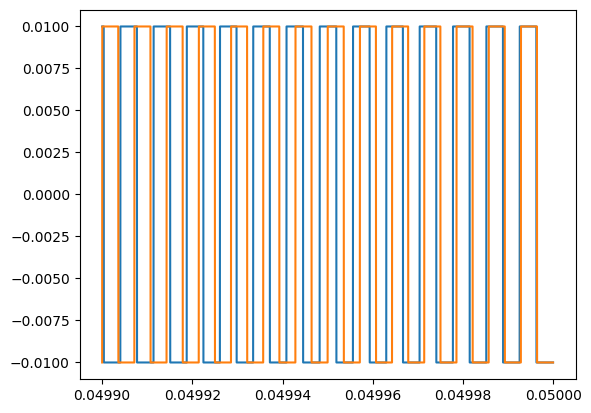

In [11]:
N=10000
plt.plot( time[-N:] ,sig[-N:])
plt.plot( time[-N:] ,sigfix[-N:])

C:\Users\a037702\AppData\Local\Temp\ipykernel_1668\4213504733.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig("signals.png")
C:\Users\a037702\AppData\Local\Temp\ipykernel_1668\4213504733.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


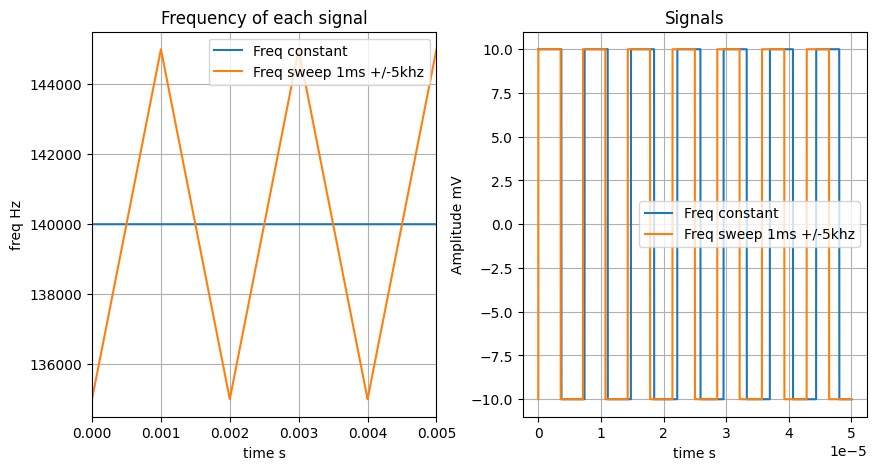

In [12]:
nn=int(5e-3/ts)

fig, axs = plt.subplots(1,2, figsize = (10,5))
fig.subplots_adjust(wspace=0.25)

axs[0].plot( time[:nn] ,nn*[f_fix],label= "Freq constant")
axs[0].plot( time[:nn] ,freqsw[:nn] , label = "Freq sweep 1ms +/-5khz")
axs[0].set_xlim([0,5e-3])
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel ("time s")
axs[0].set_ylabel ("freq Hz")
axs[0].set_title("Frequency of each signal")

N=5000
axs[1].plot( time[:N] ,1e3*sig[:N],label= "Freq constant")
axs[1].plot( time[:N] ,1e3*sigfix[:N], label = "Freq sweep 1ms +/-5khz")



axs[1].legend()
axs[1].grid()
axs[1].set_xlabel ("time s")
axs[1].set_ylabel ("Amplitude mV")
axs[1].set_title("Signals")
fig.savefig("signals.png")
fig.show()

# EMI RECEIVER EMULATOR

In [13]:
%%time
freqs, peak, avg, qp = receiver(sig/2,1/ts, rbw=9000, band='B')
freqs2, peak2, avg2, qp2= receiver(sigfix/2,1/ts, rbw=9000, band='B')

--------------------------------------------------
EMI Receiver Configuration:
  RBW           : 9000 Hz
  Step Size     : 2500.00 Hz (Target: 2500 Hz)
  Window Size   : 24985 samples
  FFT Size      : 40000 samples (Zero-Padding: True)
  Detector Time : 0.025 ms
--------------------------------------------------
--------------------------------------------------
EMI Receiver Configuration:
  RBW           : 9000 Hz
  Step Size     : 2500.00 Hz (Target: 2500 Hz)
  Window Size   : 24985 samples
  FFT Size      : 40000 samples (Zero-Padding: True)
  Detector Time : 0.025 ms
--------------------------------------------------
CPU times: total: 43.2 s
Wall time: 24.5 s


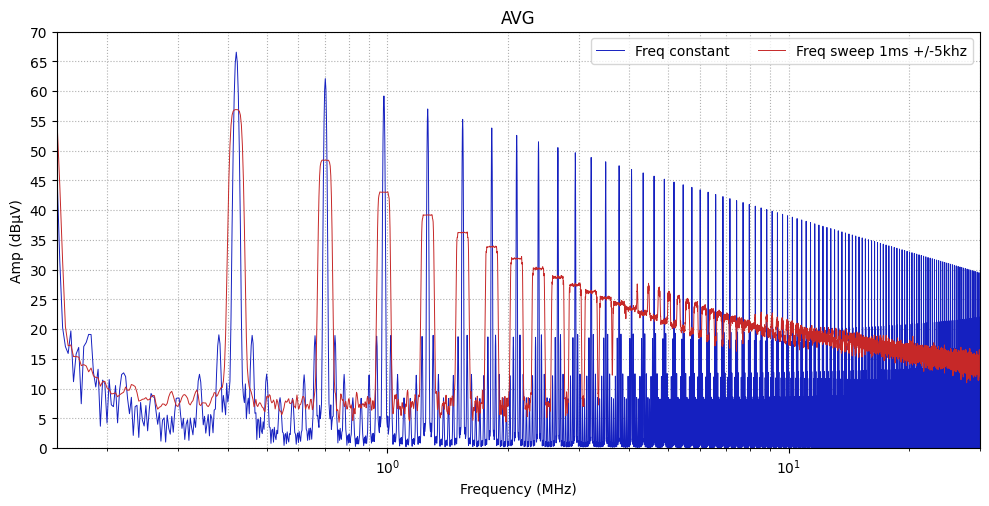

In [14]:
title="AVG"
plt.figure(figsize=(10,5))
#plt.semilogx(freqs*1e-6, peak, label='Peak', color='k')  # slightly lighter red


plt.semilogx(freqs2*1e-6, avg2, label="Freq constant", color='#1520c0', linewidth=0.7)  # slightly lighter red


plt.semilogx(freqs*1e-6, avg, label="Freq sweep 1ms +/-5khz", color='#C62828', linewidth=0.7)  # slightly lighter red

#plt.semilogx(freqs*1e-6, avg,   label='Average', color='#1520c0', alpha=0.7)  # slightly lighter blue

# see https://www.ti.com/document-viewer/lit/html/SSZT673
_= """
150 kHz → 530 kHz: 66 dBµV → 56 dBµV (logarithmic slope)
530 kHz → 5 MHz: 56 dBµV (flat)
5 MHz → 30 MHz: 60 dBµV  (flat)
""" # for peak and qpeak is the same , limite are the same for CISPR-16 and 25
# Class A: Limits for industrial/commercial environments → less strict (higher allowed emissions).
# Class B: Limits for residential environments → more strict (lower allowed emissions).
freqs0 = np.array([150e3, 500e3, 5e6, 5e6,30e6])
qp_limits = np.array([66, 56, 56, 60, 60])   # dBµV
avg_limits = np.array([56, 46, 46, 50,50])  # dBµV
#plt.semilogx(freqs0*1e-6, qp_limits ,   label='Q-Peak EN 55022/32 classB', c="r",linestyle="--")
#plt.semilogx(freqs0*1e-6,avg_limits  ,   label='AVG EN 55022/32 classB', c= "b",linestyle="--")







# CISPR 22 / EN 55032 - CLASS A (Industrial) - Mains Port
# Note: Class A has a step at 500 kHz, not 5 MHz.
freqs0 = np.array([150e3, 500e3, 500e3, 30e6])
qp_limits = np.array([79.0, 79.0, 73.0, 73.0])   # dBµV
avg_limits = np.array([66.0, 66.0, 60.0, 60.0])  # dBµV
#plt.semilogx(freqs0*1e-6, qp_limits ,   label='Q-Peak EN 55022/32 classA', c="g",linestyle="--")
#plt.semilogx(freqs0*1e-6,avg_limits  ,   label='AVG EN 55022/32 classA', c= "y",linestyle="--")








plt.ylim(0, 70)
plt.yticks(np.arange(0, 71, 5))
plt.grid(True)

plt.grid(True, which='both', ls=':')
plt.xlabel('Frequency (MHz)')
plt.xlim([0.15, 30])
plt.ylabel('Amp (dBµV)')
plt.legend(ncol=2)
plt.tight_layout()
plt.title(title)
plt.savefig("avgEm.png")
plt.show()

In [15]:
# 66 68

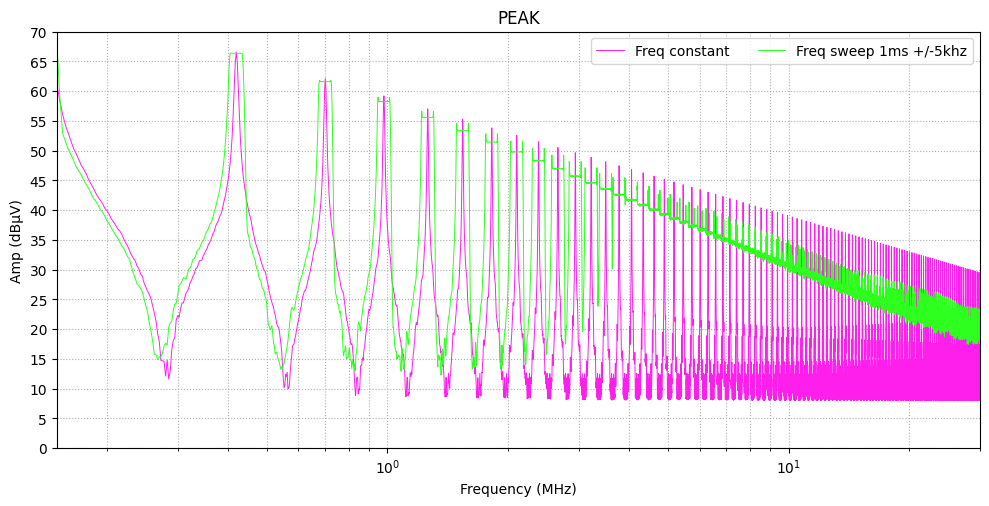

In [16]:
title="PEAK"
plt.figure(figsize=(10,5))
#plt.semilogx(freqs*1e-6, peak, label='Peak', color='k')  # slightly lighter red


plt.semilogx(freqs2*1e-6, peak2, label="Freq constant", color='#FF1FEC', linewidth=0.7)  # slightly lighter red


plt.semilogx(freqs*1e-6, peak, label="Freq sweep 1ms +/-5khz", color='#2EFF1F', linewidth=0.7)  # slightly lighter red

#plt.semilogx(freqs*1e-6, avg,   label='Average', color='#1520c0', alpha=0.7)  # slightly lighter blue

# see https://www.ti.com/document-viewer/lit/html/SSZT673
_= """
150 kHz → 530 kHz: 66 dBµV → 56 dBµV (logarithmic slope)
530 kHz → 5 MHz: 56 dBµV (flat)
5 MHz → 30 MHz: 60 dBµV  (flat)
""" # for peak and qpeak is the same , limite are the same for CISPR-16 and 25
# Class A: Limits for industrial/commercial environments → less strict (higher allowed emissions).
# Class B: Limits for residential environments → more strict (lower allowed emissions).
freqs0 = np.array([150e3, 500e3, 5e6, 5e6,30e6])
qp_limits = np.array([66, 56, 56, 60, 60])   # dBµV
avg_limits = np.array([56, 46, 46, 50,50])  # dBµV
#plt.semilogx(freqs0*1e-6, qp_limits ,   label='Q-Peak EN 55022/32 classB', c="r",linestyle="--")
#plt.semilogx(freqs0*1e-6,avg_limits  ,   label='AVG EN 55022/32 classB', c= "b",linestyle="--")







# CISPR 22 / EN 55032 - CLASS A (Industrial) - Mains Port
# Note: Class A has a step at 500 kHz, not 5 MHz.
freqs0 = np.array([150e3, 500e3, 500e3, 30e6])
qp_limits = np.array([79.0, 79.0, 73.0, 73.0])   # dBµV
avg_limits = np.array([66.0, 66.0, 60.0, 60.0])  # dBµV
#plt.semilogx(freqs0*1e-6, qp_limits ,   label='Q-Peak EN 55022/32 classA', c="g",linestyle="--")
#plt.semilogx(freqs0*1e-6,avg_limits  ,   label='AVG EN 55022/32 classA', c= "y",linestyle="--")








plt.ylim(0, 70)
plt.yticks(np.arange(0, 71, 5))
plt.grid(True)

plt.grid(True, which='both', ls=':')
plt.xlabel('Frequency (MHz)')
plt.xlim([0.15, 30])
plt.ylabel('Amp (dBµV)')
plt.legend(ncol=2)
plt.tight_layout()
plt.title(title)
plt.savefig("peakEm.png")
plt.show()

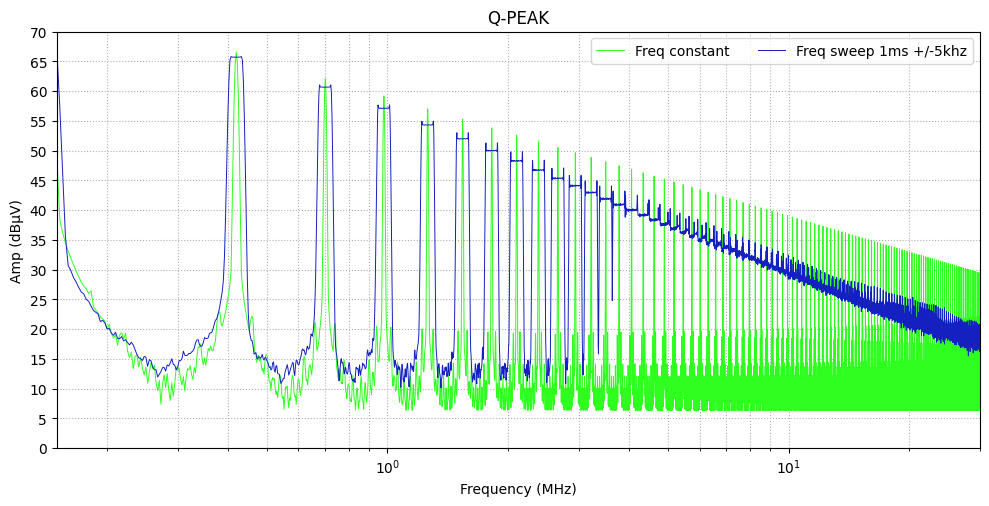

In [17]:
title="Q-PEAK"
plt.figure(figsize=(10,5))
#plt.semilogx(freqs*1e-6, peak, label='Peak', color='k')  # slightly lighter red


plt.semilogx(freqs2*1e-6, qp2, label="Freq constant", color='#2EFF1F', linewidth=0.7)  # slightly lighter red


plt.semilogx(freqs*1e-6, qp, label="Freq sweep 1ms +/-5khz", color='#1520c0', linewidth=0.7)  # slightly lighter red

#plt.semilogx(freqs*1e-6, avg,   label='Average', color='#1520c0', alpha=0.7)  # slightly lighter blue

# see https://www.ti.com/document-viewer/lit/html/SSZT673
_= """
150 kHz → 530 kHz: 66 dBµV → 56 dBµV (logarithmic slope)
530 kHz → 5 MHz: 56 dBµV (flat)
5 MHz → 30 MHz: 60 dBµV  (flat)
""" # for peak and qpeak is the same , limite are the same for CISPR-16 and 25
# Class A: Limits for industrial/commercial environments → less strict (higher allowed emissions).
# Class B: Limits for residential environments → more strict (lower allowed emissions).
freqs0 = np.array([150e3, 500e3, 5e6, 5e6,30e6])
qp_limits = np.array([66, 56, 56, 60, 60])   # dBµV
avg_limits = np.array([56, 46, 46, 50,50])  # dBµV
#plt.semilogx(freqs0*1e-6, qp_limits ,   label='Q-Peak EN 55022/32 classB', c="r",linestyle="--")
#plt.semilogx(freqs0*1e-6,avg_limits  ,   label='AVG EN 55022/32 classB', c= "b",linestyle="--")







# CISPR 22 / EN 55032 - CLASS A (Industrial) - Mains Port
# Note: Class A has a step at 500 kHz, not 5 MHz.
freqs0 = np.array([150e3, 500e3, 500e3, 30e6])
qp_limits = np.array([79.0, 79.0, 73.0, 73.0])   # dBµV
avg_limits = np.array([66.0, 66.0, 60.0, 60.0])  # dBµV
#plt.semilogx(freqs0*1e-6, qp_limits ,   label='Q-Peak EN 55022/32 classA', c="g",linestyle="--")
#plt.semilogx(freqs0*1e-6,avg_limits  ,   label='AVG EN 55022/32 classA', c= "y",linestyle="--")








plt.ylim(0, 70)
plt.yticks(np.arange(0, 71, 5))
plt.grid(True)

plt.grid(True, which='both', ls=':')
plt.xlabel('Frequency (MHz)')
plt.xlim([0.15, 30])
plt.ylabel('Amp (dBµV)')
plt.legend(ncol=2)
plt.tight_layout()
plt.title(title)
plt.savefig("qpeakEm.png")
plt.show()